## Packages and Assets

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

import matplotlib.pyplot as plt

import pickle


## Dependencies

In [2]:
test = pd.read_csv('../../assets/data/splits/test/preprocessed.csv')
y_test = test['label']

In [3]:
with open('../../assets/traditional_assets/cv_set.pkl', 'rb') as fout:
    cv_vec, cv_best_model = pickle.load(fout)

with open('../../assets/traditional_assets/tfidf_set.pkl', 'rb') as fout:
    tfidf_vec, tfidf_best_model = pickle.load(fout)


## Functions

In [4]:
def viewPredictedRows(X_test, y_test, y_pred):
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    df['correct'] = df['y_test'] == df['y_pred']
    df['correct'] = df['correct'].apply(lambda x: 'Correct' if x else 'Incorrect')
    df['title'] = X_test
    return df


In [5]:
def show_confusion_matrix(cm):
        print("Confusion Matrix")
        plt.figure(figsize=(10, 7))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

## Predictions considering best traditional models for both vectorization

### CountVectorizer

In [6]:
X_test = cv_vec.transform(test['title']).toarray()
X_test_names = pd.DataFrame(X_test, columns=cv_vec.get_feature_names_out())
X_test_names

,abaixo,abertura,abicom,absurdo,aceita,acelera,acelerar,acionistas,acompanha,acordo,...,vender,vermelho,vespera,vinculante,vinculantes,volatil,volatilidade,voltar,volume,warren
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.56      0.99      0.72       118
           2       0.00      0.00      0.00        41

    accuracy                           0.56       210
   macro avg       0.19      0.33      0.24       210
weighted avg       0.31      0.56      0.40       210

Confusion Matrix


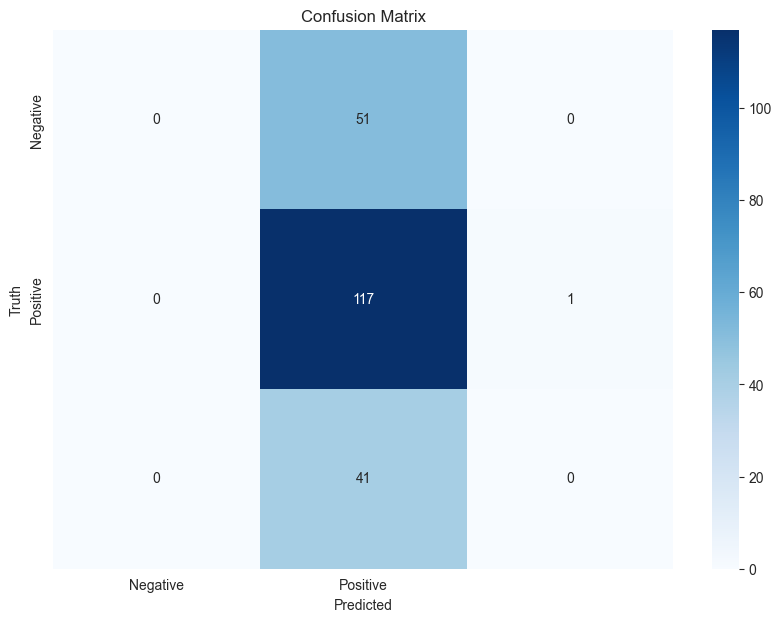

In [7]:
y_pred = cv_best_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)

In [8]:
df_results = viewPredictedRows(test['title'], y_test, y_pred)
df_results


,y_test,y_pred,correct,title
0,1,1,Correct,refinaria petrobras bahia oferta <NUM> cento a...
1,1,1,Correct,bolsonaro diz ter vontade privatizar petrobras...
2,0,1,Incorrect,petrobras fecha baixa <NUM> cento apos queda p...
3,2,1,Incorrect,anp discute audiencia proposta sobre envio dad...
4,2,1,Incorrect,3r petroleum queda <NUM> cento producao agosto
...,...,...,...,...
205,0,1,Incorrect,politica precos coloca petrobras sinuca bico c...
206,2,1,Incorrect,lira diz reacao mercado sobre petrobras bolha ...
207,0,1,Incorrect,petrobras reduz preco gas distribuidoras revis...
208,1,1,Correct,veja <NUM> novas acoes sugeridas nova futura c...


### TFIDF

In [9]:
X_test = tfidf_vec.transform(test['title']).toarray()
X_test_names = pd.DataFrame(X_test, columns=tfidf_vec.get_feature_names_out())
X_test_names

,abaixo,abertura,abicom,absurdo,aceita,acelera,acelerar,acionistas,acompanha,acordo,...,vender,vermelho,vespera,vinculante,vinculantes,volatil,volatilidade,voltar,volume,warren
0,0.403791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.56      1.00      0.72       118
           2       0.00      0.00      0.00        41

    accuracy                           0.56       210
   macro avg       0.19      0.33      0.24       210
weighted avg       0.32      0.56      0.40       210

Confusion Matrix


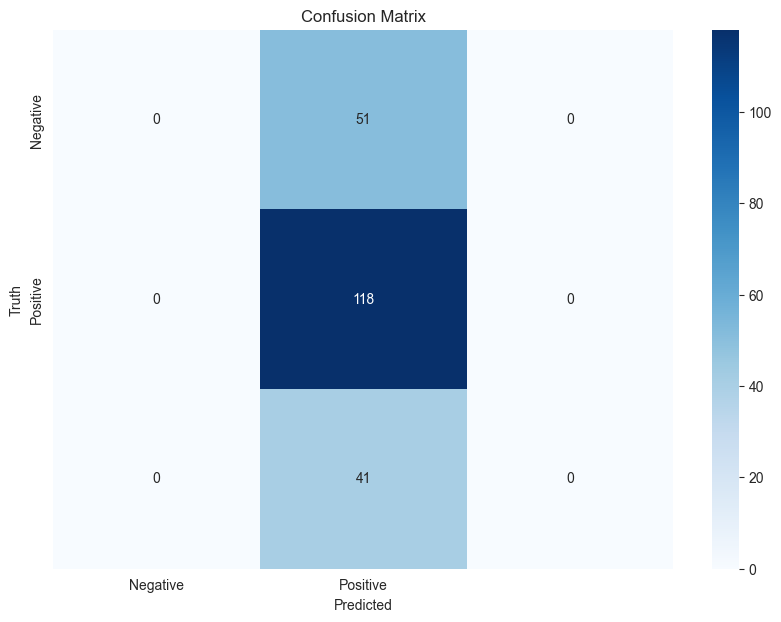

In [10]:
y_pred = cv_best_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)

In [11]:
df_results = viewPredictedRows(test['title'], y_test, y_pred)
df_results

,y_test,y_pred,correct,title
0,1,1,Correct,refinaria petrobras bahia oferta <NUM> cento a...
1,1,1,Correct,bolsonaro diz ter vontade privatizar petrobras...
2,0,1,Incorrect,petrobras fecha baixa <NUM> cento apos queda p...
3,2,1,Incorrect,anp discute audiencia proposta sobre envio dad...
4,2,1,Incorrect,3r petroleum queda <NUM> cento producao agosto
...,...,...,...,...
205,0,1,Incorrect,politica precos coloca petrobras sinuca bico c...
206,2,1,Incorrect,lira diz reacao mercado sobre petrobras bolha ...
207,0,1,Incorrect,petrobras reduz preco gas distribuidoras revis...
208,1,1,Correct,veja <NUM> novas acoes sugeridas nova futura c...
